#開始

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

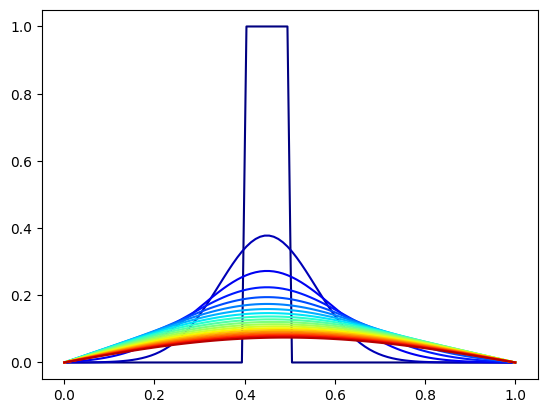

In [88]:
nx = 100
x  = np.linspace(0.0,1.0,nx)
θ  = np.zeros_like(x)
θ[40:50]  = 1.
Δx = 1.0/(nx-1)
α = 0.1
init   = θ
t_span = [0,1]
t_eval = np.linspace(*t_span,20) # time for sampling
def diffusion(t,θ,α,Δx):
    dθ = α * np.diff(θ,2)/(Δx**2)
    return np.hstack([0.0,dθ,0.0])
sol = solve_ivp(diffusion,t_span,init,method="RK45",t_eval=t_eval,args=(α,Δx))

cmap = plt.get_cmap('jet')
Np = len(sol.t)
for i in range(Np):
    plt.plot(x,sol.y[:,i],c=cmap(i/Np))

### グラフ表示

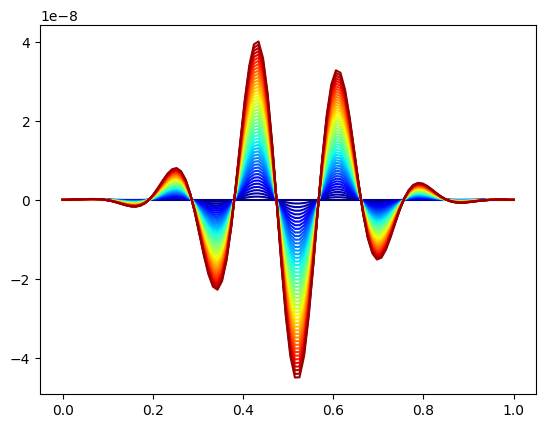

In [196]:
# parameters
t_span = [0.0,100.0]
t_eval = np.linspace(*t_span,50) # time for sampling
# init
nx = 100
x_span = [0.,1.0]
x  = np.linspace(*x_span,nx)
Δx = 100/(nx-1)
u  =  np.zeros_like(x)
init   = u
k0 = 0.000001
h0 = 0.0001**2
s = 1+0.01*np.cos(30*x)*np.exp(-30*(x-0.5)**2)
ds =  np.gradient(s, Δx)
dds = np.gradient(ds, Δx)
# ODEs
def ODEs(t,u,Δx):
    du = - k0* ds[2:-2]*u[2:-2] * np.convolve(u,[3.0,-4.0,1.0],'valid')[1:-1]/(2*Δx)\
         - k0* 1/2 *dds[2:-2]\
         - k0* h0* 1/3*ds[2:-2]*np.diff(u,3)[1:]/(Δx**3)\
         - k0* h0* 1/3*s[2:-2]*np.diff(u,4)/(Δx**4)\
#         - k0* 0.001
    return np.hstack([0.,0.,du,0.,0.])
# solve
sol = solve_ivp(ODEs,t_span,init,method="RK45",t_eval=t_eval,args=(Δx,),rtol=1e-8)

cmap = plt.get_cmap('jet')
Np = len(sol.t)
for i in range(Np):
    plt.plot(x,sol.y[:,i],c=cmap(i/Np))

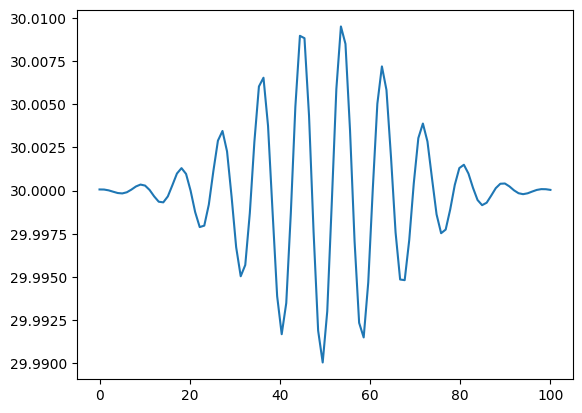

In [156]:
plt.plot(x,s+29)

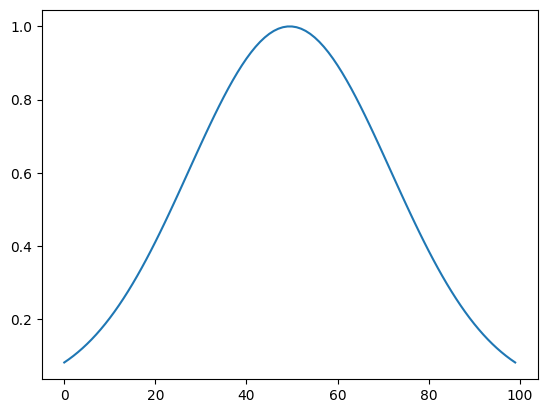

In [161]:
plt.plot(np.exp(-0.001*(x-50)**2))